<h1>Partitionierende Clusteranalyse</h1>
<h2>Generierung der Datensätze</h2>

Bevor mit dem partitionierenden Clustering begonnen werden kann, wird ein Datensatz benötigt. Dieser wird in diesem Beispiel mithilfe der make_blobs Methode erzeugt. <br>

<table style="width:100%">
    <caption style="color:black"><b>Parameter der make_blobs Methode</b></caption>
  <tr>
    <th style="text-align: left">Parameter</th>
    <th style="text-align: left">Bedeutung</th>
    <th style="text-align: left">Wert im Beispiel</th>
  </tr>
  <tr>
    <td style="text-align: left">n_samples</td>
    <td style="text-align: left">Wie viele Datensätze sollen angelegt werden?</td>
    <td style="text-align: left">1000</td>
  </tr>
  <tr>
    <td style="text-align: left">n_features</td>
    <td style="text-align: left">Wie viele Merkmale soll jeder Datensatz beinhalten?</td>
    <td style="text-align: left">5</td>
  </tr>
  <tr>
    <td style="text-align: left">centers</td>
    <td style="text-align: left">Wie viele Zentren (Zielklassen) sollen gebildet werden?</td>
    <td style="text-align: left">4</td>
  </tr>
  <tr>
    <td style="text-align: left">cluster_std</td>
    <td style="text-align: left">Wie groß ist die Standabweichung?</td>
    <td style="text-align: left">3</td>
  </tr>
  <tr>
    <td style="text-align: left">random_state</td>
    <td style="text-align: left">Durch diesen Parameter bleibt der Rückgabewert bei wiederholtem Methodenaufruf konstant.</td>
    <td style="text-align: left">0</td>
   <tr>
    <td style="text-align: left">center_box</td>
    <td style="text-align: left">In welchem Bereich sollen die Zentroide der Zielklassen erzeugt werden?</td>
    <td style="text-align: left">0 bis 20 (Fließkommazahlen)</td>
  </tr>
  </tr>
</table>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html"><I>->Zur Dokumentation von make_blobs<I></a><br>

In dem folgenden Szenario stellen die 1000 Datensätze 1000 Kunden einer Bank dar. Die Zentren bzw. Zielklassen, zu welchen sich die Datensätze zuordnen lassen, werden zur Veranschaulichung (in Anlehnung an das Bankszenario) als Bonitätsklassen bezeichnet.

In [ ]:
from sklearn.datasets import make_blobs

center_box = (0, 20)

X , y= make_blobs(n_samples = 1000,center_box=center_box, n_features=5, centers=4, cluster_std=3, random_state=0)

print(' Datensätze '.center(80, '*'))
print(f'{X} \n')
print(' Zielklassen '.center(80, '*'))
print(y)

X: Ein Zweidimendionales ndArray, welches die erzeugten Datensätze mit ihren Merkmalen beinhaltet. <br>
Y: ndArray mit Ganzzahlen, welche die Zugehörigkeit des einzelnen Datensatzes zur tatsächlichen Zielklasse beeinhaltet.

<h2> Visualisierung der Abhängigkeiten</h2> <br>
Um die Daten mit der pairplot Methode darstellen zu können, müssen diese in ein DataFrame Objekt umgewandelt werden.<br>
Ein DataFrame ist eine zweidimensionale, tabellarische Struktur mit beschrifteten Achsen (Zeilen und Spalten). 
Die einzelnen Zeilen stellen hier die jeweiligen Datensätze dar, während die Spalten die jeweiligen Merkmale des Datensatzes abbilden.
Standardmäßig sind die Zeilen und Spalten mit 0,1,2,3,...,n beschriftet. Im Folgenden werden die Spaltenbeschriftungen zur Verdeutlichung der Situation entsprechend angepasst. Die einzelnen Merkmalsausprägungen weichen hier allerdings von der Realität ab. <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html"><I>->Zur Dokumentation von DataFrame<I></a><br>

In [ ]:
import pandas as pd

df = pd.DataFrame(X, columns = ['Gehalt', 'Alter', 'Disporahmen', 'Kontostand', 'Zahlungsverpflichtungen']) 
df['Bonitätsklasse'] = y
print(df)

<h3>Visualisierung mit Pairplot</h3><br/>
Zur Visualisierung der Verteilung von Datensätzen anhand ihrer Merkmale können verschiedene Methoden angewandt werden. 
Im Folgenden wurde der Dataframe der Pairplot Methode als Parameter übergeben. Als Rückgabewert der Methode werden immer zwei Merkmale zueinander in Beziehung gesetzt.
Dies erfolgt dann für jede mögliche Kombination, sodass bei fünf Merkmalen eine 5x5 Matrix entsteht. Mit dem zusätzlichen Paramerter "hue" werden die Zielklassen eingefärbt. <br>
<a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html"><I>->Zur Dokumentation von pairplot<I></a><br>

In [ ]:
from seaborn import pairplot

pairplot(df, hue = 'Bonitätsklasse')

Die Methode pairplot verwendet zwei verschiedene Diagrammarten zur Visualisierung. Auf der Diagonalen sind Verteilungskurven zu sehen. Diese zeigen die Verteilung einer einzelnen Variablen, weil an dieser Stelle jeweils ein Merkmal mit sich selbst verglichen wird (z. B. Gehalt mit Gehalt). Die übrigen Grafiken sind Streudiagramme. Wie bei Distanzmatrizen ist auch hier nur die Betrachtung eines Teils erforderlich, weil eine Spiegelung an der Diagonalen erfolgt. Die Streudiagramme visualisieren jeweils den Zusammenhang von zwei gewählten Merkmalen zueinander. 

Bezogen auf den vorliegenden Datensatz sind für die Bonitätsklasse 3 folgende Aussagen möglich:

<ul>
    <li>niedriges Gehalt</li>
     <li>niedriges Alter</li>
    <li>mittlerer Disporahmen</li>
    <li>mittlerer Kontostand</li>
    <li>hohe Zahlungsverpflichtungen</li>
</ul>

Diese Aussagen basieren auf einem visuellen Vergleich der Bonitätsklassen miteinander. Statistisch korrekt wäre die Angabe eines Kriteriums für die Einteilung z. B. "niedrig" für das unter Drittel. Der Einfachheit halber wurde in diesem Beispiel darauf verzichtet. 

Es liegt kein Bezug zur Realität vor, da es sich um künstlich erzeugte Datensätze handelt. Eine Erklärung der kausalen Zusammenhänge zwischen den Merkmalen wie zwischen Alter und Gehalt (junge Kunden haben aufgrund von Studium oder Ausbildung ein niedriges Gehalt) ist somit nicht möglich.

<h3>Visualisierung mit Scatterplot</h3><br/>
Im nächsten Schritt werden die Datensätze fünfdimensional dargestellt. Die Merkmale "Gehalt", "Alter" und "Disporahmen" werden an der X-, Y- und Z-Achse abgebildet. Das Merkmal "Kontostand" wird über die Farbe (je dunkler, desto höher der Wert) und das Merkmal "Zahlungsverpflichtungen" über die Größe modelliert (je größer, desto höher der Wert). Über Farbe und Größe können so die vierte und fünfte Dimension simuliert werden.<br/>
Um das untere Codesnippet ausführen zu können, ist die Installation der "plotly" Bibliothek erforderlich (pip install plotly).<br/>
<I>Quelle: <a href="https://github.com/ostwalprasad/PythonMultiDimensionalPlots">https://github.com/ostwalprasad/PythonMultiDimensionalPlots</a> [Stand: 01.06.2021]</I>

In [ ]:
import plotly
import plotly.graph_objs as go

data = df

#Setzen der marker properties
markersize = data['Kontostand']
markercolor = data['Zahlungsverpflichtungen']

#Erstellen der Plotly figure
fig1 = go.Scatter3d(x=data['Gehalt'],
                    y=data['Alter'],
                    z=data['Disporahmen'],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Erstellen des Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Gehalt"),
                                yaxis=dict( title="Alter"),
                                zaxis=dict(title="Disporahmen")),)

#Ausgabe als html Datei
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("5D Plot.html"))

<h2> Partionierendes Clustern </h2>

Ablauf einer partitionierenden Clusteranalyse mit dem KMeans Algorithmus:
<ol>
    <li>
Angabe der Anzahl $k$ an Clustern
    </li>
    <li>
Zufällige Initialisierung der $k$ Zentroide
    </li>
    <li>
Zuordnung jeden Datensatzes zum nächstgelegenen Zentroid
    </li>
    <li>
Berechnung der neuen Zentroide für jedes Cluster
    </li>
    <li>
Wiederholung der Schritte 3 & 4, bis sich die Position der Zentroide nicht mehr ändert </li>
</ol>  

In Python lässt sich die partitionierende Clusteranalyse mit der Klasse "KMeans" umsetzen. Dem Konstruktor werden hier zwei Werte übergeben: Die Anzahl der Cluster und ein Integer für random_state damit bei wiederholtem Methodenaufruf dieselben Zentroide gewählt werden. Mit dem Methodenaufruf fit() wird das Data Set, mit welchem unser Model trainiert werden soll, als Parameter übergeben. <br/>
Gespeichert wird das trainierte Model in der Variable "kmeans".
Mit kmeans.predict() kann dann das trainierte Modell an einem Datenbestand angewendet werden. <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><I>->Zur Dokumentation von KMeans<I></a><br>



In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

y_kmeans=kmeans.predict(X)

#oder in kurz: y_kmeans = KMeans(n_clusters=4, random_state=0).fit_predict(X)

<h3>Angleichen der Bezeichnungen von Zielklassen und durch KMeans gebildeten Clustern</h3><br/>
Da KMeans nicht die Bezeichnungen der Zielklassen kennt, stimmen die Bezeichnungen der Cluster eventuell nicht mit denen der Zielklassen überein. Zur Verdeutlichung: Es ist nicht zwangsläufig der Fall, dass KMeans unter dem Cluster "0" dieselben Werte subsumiert, wie es die make_blobs Methode bei der Zielkasse "0" tat. Auf das Beispiel bezogen könnte es somit sein, dass KMeans unter dem Cluster "0" Datensätze mit einer sehr schlechten Bonität einordnet, unsere Zielklasse dort im Gegensatz dazu aber eine sehr gute Bonität aufweist. Um Zielklassen und durch KMeans gebildete Cluster miteinander vergleichen zu können, werden in dem folgenden Schritt die Bezeichnungen der gebildeten Cluster and die Bezeichnungen der Zielklassen angeglichen:
<I>Quelle: <a href="https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html">https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html</a> [Stand: 05.06.2021]</I>


In [ ]:
from scipy.stats import mode
from numpy import zeros_like

labels = zeros_like(y_kmeans)
for i in range(4):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]
    print(labels)

Zuerst wird mit dem Methodenaufruf numpy.zeros_like(y_kmeans) ein ndArray gebildet, welches dieselben Maße wie das übergebene Array hat. Befüllt ist jenes Array zum Zeitpunkt der Initialisierung ausschließlich mit Nullen. Am Ende wird das ndArray die durch KMeans erfolgte Zuordnung der Datensätze zu den Clustern beinhalten, allerdings an die Bezeichnungen der Zielklassen angeglichen.<br>
Dafür durchläuft eine Zählvariable zunächst die Zahlen 0 bis 3 (unsere Zielklassen) in einer Schleife. In der Variablen "mask" wird ein Array mit boolschen Werten gespeichert. Durch den Ausdruck "(y_kmeans == i)" sind die Werte des Arrays an den Stellen "true", an denen die Stellen des ndArray "y_kmeans" mit dem Wert der Zählvariable übereinstimmen. Im ersten Durchlauf der Schleife hätte das Array "mask" somit nur an den Stellen den Wert "true", an denen ein Datensatz durch KMeans in dem Cluster "0" eingeordnet wurde. <br>
Im zweiten Schritt werden nun die Nullen im ndArray "labels" mit den Werten der jeweiligen (an die Bezeichnung der durch KMeans gebildeten Cluster angeglichenen) Zielklasse überschrieben. Zuerst das mit "0" bezeichnete Cluster, dann das mit "1" bezeichnete Cluster, usw. Möglich ist dies, da wir einem ndArray als Index ein boolsches Array mitgeben können. Indiziert werden in dem Array somit jene Werte an den Stellen, an denen das als Index übergebene Array den Wert "true" zurückgibt.<br>
Die Anpassung der Bezeichnung erfolgt mit der scipy.stats.mode Methode. Diese Methode liefert ein Array mit dem Modus des übergebenen Arrays zurück. Als Parameter übergeben wir hier das ndArray "y", welches die Zielklassen beinhaltet. Als Index übergeben wir auch hier dasselbe boolsche Array wie bei dem ndArray "labels". Somit wird in dem ndArray "y" der häufigste Wert an den Stellen gesucht, an denen KMeans die jeweilige Clusterbezeichnung der Zählvariable zugeteilt hat. Da die Abweichungen von Zielklassen und gebildeten Clustern gewöhnlich den Modus nicht verfälschen dürften, kann so zuverlässig die eigentliche Bezeichnung des gebildeten Clusters herausgefunden werden. <br>
Da wir als Parameter ein eindimensionales Array übergeben, beinhaltet das Rückgabearray nur einen Wert. Auf jenen können wir somit direkt mit dem Index "0" zugreifen. (Bei einem zweidimensionalen Array hätte das Rückgabearray eine Länge von 2, usw.) Dieser Wert wird nun an den Stellen eingesetzt, an welchen y_kmeans ein Cluster verortet hat. Somit wurde die Bezeichnung der von KMeans gebildeten Cluster an die Bezeichnung der Zielklassen angeglichen, ohne das Ergebnis zu verfälschen.
<h3>Güte</h3>

In Python lässt sich die Güte mithilfe der Methode accuracy_score berechnen. Als Parameter wurden der Methode die tatsächlichen Zielklassen und die durch KMeans gebildeten Cluster übergeben
Die Methode berechnet die Genauigkeit mit der folgenden Formel: <br/>
 $\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$ <br/>
$\hat{y}_i$ entspricht dem vorhergesagten Wert <br/>
$y_{i}$ enspricht dem tatsächlichen Wert <br/>
$1(x)$ ist die <a href="https://en.wikipedia.org/wiki/Indicator_function">Indikatorfunktion</a> <br/>
Eine andere Möglichkeit die Güte zu berechnen wäre, die tatsächlichen Werte durch die Gesamtanzahl der Datensätze zu dividieren.
Je näher die Accuracy an 1 liegt, desto höher ist die Güte der Vorhersage. In unserem Fall ergibt sich eine Accuracy von 0.953 bzw. 95,3%. <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><I>->Zur Dokumentation von accuracy_score<I></a><br>

In [ ]:
from sklearn.metrics import accuracy_score

print(f'Die Güte beträgt: {accuracy_score(y, labels)}')

<h2>Konfusionsmatrix</h2><br/>
Die Konfusionsmatrix wird nur benutzt, um zu klassifizieren. Sie sagt keine numerischen Werte voraus. 

Im Fall einer 2x2 Matrix könnte sich ein solches Szenario abspielen: 

In der Beispiel-Matrix sind insgesamt 165 einsortierte Fälle zu sehen. Angenommen es handelt sich um eine Angabe der Genauigkeit eines Testes, ob ein Mensch erkrankt ist oder nicht. In diesem Fall würde Ja für positiv getestet und Nein für negativ getestet stehen. Damit würde der Test 110 Fälle als negativ einstufen, obwohl nur 105 wirklich nicht erkrankt sind. Von den 60 Erkrankten würden folglich nur 55 positiv getestet.<br/>
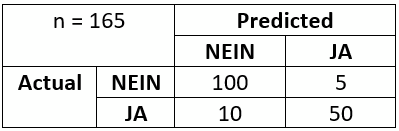<br/>
Daraus ergeben sich 100 die in Wirklichkeit und vom Test als negativ eingestuft wurden, diese werden true negatives genannt. Die 50, die richtig als positiv einsortiert wurden, werden true postives genannt. Die 5 falsch positiv getesteten werden false positives genannt oder auch Type 1 Error und die 10 die noch übrig bleiben false negatives oder Type 2 Error. Die true negatives und positives sollen maximiert und die false negatives und positives minimiert werden. Je nach Anwendungsbereich ist es wichtiger einen der beiden false Werte kleiner zu bekommen als den anderen. So ist es zum Beispiel schlimmer, falsch negativ auf eine Krankheit getestet zu werden, gegen die es eine Behandlung gibt, als falsch positiv.<br/>
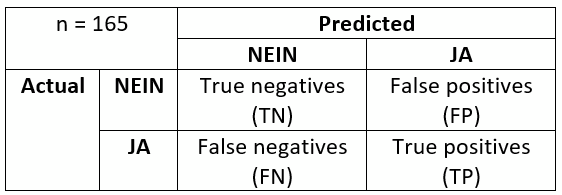<br/>
Aus diesen Matrizen lassen sich folgende Werte ableiten:
<ul>
    <li>$Genauigkeit=\frac{TP+TN}{n}$</li>
    <li>$Fehlerrate=\frac{FP+FN}{n}$</li>
    <li>$Spezifität=\frac{TN}{TN+FP}$</li>
    <li>$Präzision=\frac{TP}{TP+FP}$</li>
    <li>$Sensitivität=\frac{TP}{TP+FN}$</li>
    <li>$Prävalenz=\frac{FN+TP}{n}$</li>
</ul>
Bei größeren Matrizen werden zur Berechnung der Genauigkeit alle Werte in der Diagonalen miteinander addiert und durch die gesamte Anzahl geteilt. Insgesamt ist die Konfusionsmatrix genauer als die Güte.<br/>
In unserem Fall handelt es sich um eine 4x4 Matrix, da wir die 4 Cluster der Bonitätsklassen einander gegenüberstellen. <br>
Im Folgenden wird diese mithilfe von Python mit der Methode confusion_matrix dargestellt. Der Methode wurden als Parameter die tatsächlichen Zielklassen und die durch die KMeans gebildeten Cluster übergeben. Zum besseren Verständnis wurde die Konfusionsmatrix einem DataFrame-Objekt inklusive Achsenbeschriftungen übergeben. <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html"><I>->Zur Dokumentation von confusion_matrix<I></a><br>

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

matrix = confusion_matrix(y, labels)
df = pd.DataFrame(matrix, columns=np.unique(y), index = np.unique(y))
df.index.name = 'Actual'
df.columns.name = 'Predicted'
print(df)

Zur Veranschaulichung kann eine confusion_matrix in eine Heatmap überführt werden. Der Begriff der Heatmap resultiert aus den verwendeten Farben, die denen einer Wärmebildkamera entsprechen. Je kräftiger das Rot, desto höher der Wert. Der Vorteil einer Heatmap ist die bessere Darstellung von Zwischenstufen.
In Python lässt sich die Heatmap mit der Methode heatmap darstellen. Als Parameter wurden der Methode die Konfusionsmatrix in Form eines DataFrames inklusive Achsenbeschriftungen, die Färbung der Heatmap, die Stärke der Trennlinien der Zellen, sowie zwei weitere zur Beschreibung der Zellen übergeben. <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html"><I>->Zur Dokumentation von heatmap<I></a><br>

In [ ]:
from seaborn import heatmap

heatmap(df, cmap='Reds', linecolor='Black', linewidths='1', annot= True, fmt='g')

Actual: tatsächliche Bonitätsklasse <br/>
Predicted: durch kMeans zugeordnete Bonitätsklasse

In der Diagonalen werden die korrekt zugeordneten Datensätze dargestellt. Bei einer Güte von 100% würde die Diagonale den dunkelsten möglichen Rotton (Skala: 250) annehmen. Dies ist in der Bonitätsklasse 3 der Fall. Daraus folgt, dass in der Bonitätsklasse 3 alle anderen Felder weiß (Skala: 0) sind. 

In der tatsächlichen Bonitätsklasse 0 liegt keine vollständige Übereinstimmung vor. Das bedeutet, dass der Rotton bei Actual 0 und Predicted 0 etwas heller ist. Durch das kMeans-Verfahren wurden 238 Objekte richtig in die Bonitätsklasse 0 einsortiert. 7 Objekte wurden fälschlicherweise der Bonitätsklasse 1 sowie 5 der Bonitätsklasse 2 zugeordnet. Diese Felder sind nun etwas dunkler als bei 0 fehlerhaft eingeordneten Objekten. Diese Interpretation gilt für die weiteren Zeilen simultan: 

Tatsächliche Bonitätsklasse 1:
<ul>
    <li>4 Objekte in Cluster 0 eingeordnet</li>
    <li>232 Objekte korrekt eingeordnet</li>
    <li>14 Objekte in Cluster 2 eingeordnet</li>
    <li>0 Objekte in Cluster 3 eingeordnet</li>
</ul>

Tatsächliche Bonitätsklasse 2: 
<ul>
    <li>3 Objekte in Cluster 0 eingeordnet</li>
    <li>14 Objekte in Cluster 1 eingeordnet</li>
    <li>233 Objekte korrekt eingeordnet</li>
    <li>0 Objekte in Cluster 3 eingeordnet</li>
</ul>

Weitere daraus mögliche Berechnungen:
<ul>
<li>$Genauigkeit=\frac{TP+TN}{n}=\frac{953}{1000}$=95,3%</li>
<li>$Fehlerrate=\frac{FP+FN}{n}=\frac{47}{1000}$=4,7%</li>
</ul>

Folglich wurden insgesamt 47 Kunden in falsche und 953 in die richtigen Bonitätsklassen eingeordnet. Dies führt zur Accuracy von 95,3% und einer Fehlerrate 0,047 also 4,7%.

<h3>Quellen zur Güte, Konfusionsmatrix und Heatmap:</h3><br/> 
<I><a href="https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score">https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score</a> [Stand: 27.05.2021]</I><br/>
<I><a href="https://www.saracus.com/blog/performance-metriken-klassifikation-2-2/">https://www.saracus.com/blog/performance-metriken-klassifikation-2-2/</a> [Stand: 27.05.2021]</I><br/>
<I><a href="https://www.youtube.com/watch?v=Y10GEI1NKgA">https://www.youtube.com/watch?v=Y10GEI1NKgA</a> [Stand: 27.05.2021]</I><br/>
<I><a href="https://www.xovi.de/was-ist-eine-heatmap/">https://www.xovi.de/was-ist-eine-heatmap/</a> [Stand: 27.05.2021]</I><br/>
<I><a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html">https://seaborn.pydata.org/generated/seaborn.heatmap.html</a> [Stand: 27.05.2021]</I><br/>
<I><a href="https://datamines.de/konfusionsmatrix">https://datamines.de/konfusionsmatrix</a> [Stand: 27.05.2021]</I><br/>